(-0.5, 298.5, 167.5, -0.5)

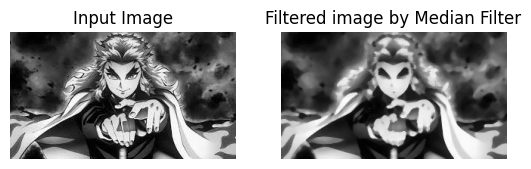

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('/home/dmacs-5/Documents/mtech_2023/Image Processing/media/download.jpeg',cv2.IMREAD_GRAYSCALE)
kernal_size = 5
filtered_image = cv2.medianBlur(image,kernal_size)
plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(filtered_image, cmap = 'gray')
plt.title('Filtered image by Median Filter')
plt.axis('off')


(-0.5, 200.5, 160.5, -0.5)

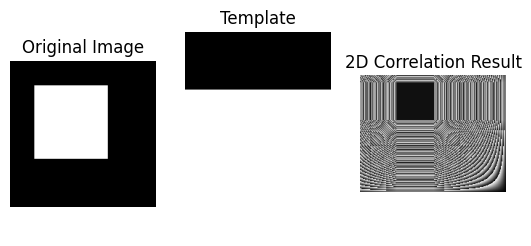

In [17]:
# Image Correlation

import cv2
import numpy as np
from scipy.signal import correlate2d
import matplotlib.pyplot as plt

# Create a 300 x 300 grayscale image
image = np.zeros((300, 300), dtype = np.uint8)

# Draw a white rectangle
cv2.rectangle(image, (50, 50), (200, 200), 255, thickness = cv2.FILLED)

# Define a region for the grayscale template
template = image[10:150, 50:150]

# Perform 2D correlation
correlation_result = correlate2d(image, template, mode = 'valid')

# Display the result
plt.subplot(131)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(template, cmap = 'gray')
plt.title('Template')
plt.axis('off')

plt.subplot(133)
plt.imshow(correlation_result, cmap = 'gray')
plt.title('2D Correlation Result')
plt.axis('off')


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(-0.5, 299.5, 299.5, -0.5)

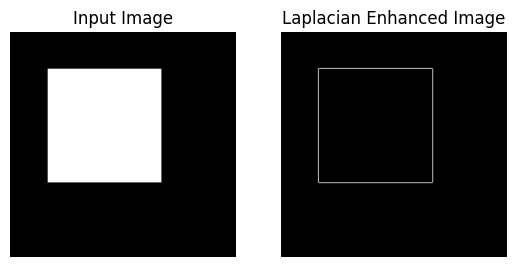

In [19]:
laplacian_kernel = np.array([[0,2,0],[2,-8,2],[0,2,0]])
high_pass_image = cv2.filter2D(image, -1, laplacian_kernel)

# Optionally, normalize the high-pass image to enhance details
high_pass_image = cv2.normalize(high_pass_image, None, 0, 255, cv2.NORM_MINMAX)
print(high_pass_image)
plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(high_pass_image, cmap = 'gray')
plt.title('Laplacian Enhanced Image')
plt.axis('off')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/home/dmacs-5/Documents/mtech_2023/Image Processing/media/download.jpeg',cv2.IMREAD_GRAYSCALE)
kernal  = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
height,width = image.shape
dft_image = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft_image)
magnitude_spectrum = 20*np.log(cv2.magnitude(
      dft_shift[:,:,0],
      dft_shift[:,:,1])
   )
dft_kernal = cv2.dft(np.float32(kernal),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift_kernal = np.fft.fftshift(dft_kernal)
magnitude_spectrum2 = 20*np.log(cv2.magnitude(
      dft_shift_kernal[:,:,0],
      dft_shift_kernal[:,:,1])
   )
multiply_indi = cv2.multiply(dft_shift,dft_shift_kernal)

(-0.5, 298.5, 167.5, -0.5)

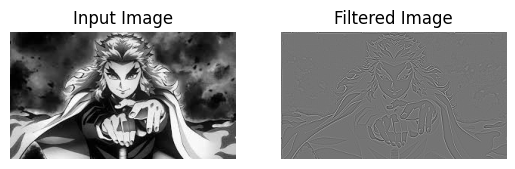

In [1]:
#High Pass filter
import cv2
import numpy as np
import numpy.fft as n
import matplotlib.pyplot as plt

image = cv2.imread('/home/dmacs-5/Documents/mtech_2023/Image Processing/media/download.jpeg',cv2.IMREAD_GRAYSCALE)
mask =  np.array([[0,1,0],[1,-4,1],[0,1,0]])
transformed_image = n.fft2(image)
transformed_mask = n.fft2(mask,s=image.shape)
convolu = transformed_image * transformed_mask
sharpened_image = n.ifft2(convolu).real

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(sharpened_image, cmap = 'gray')
plt.title('Filtered Image')
plt.axis('off')


(-0.5, 298.5, 167.5, -0.5)

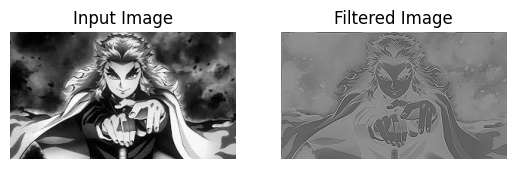

In [4]:
#Band Pass filter
filt = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]]) / 9
mask =  np.array([[0,1,0],[1,-4,1],[0,1,0]])
transformed_filt = n.fft2(filt,s=image.shape)
convolu_low = transformed_image*transformed_filt
smoothed_imge = n.ifft2(convolu_low).real
band_pass_filtered = sharpened_image - smoothed_imge 
plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(band_pass_filtered, cmap = 'gray')
plt.title('Filtered Image')
plt.axis('off')

In [ ]:
lower_frequency =10
higher_frequency = 60
